# Predicting Survival

In [1]:
getwd()
setwd("c:/users/ledin/Desktop/Titanic")
train = read.csv(file = 'train.csv', stringsAsFactors = FALSE, header = TRUE)
test = read.csv(file = 'test.csv', stringsAsFactors = FALSE, header = TRUE)

[1] "C:/Users/ledin/Desktop/R files"

In [2]:
head(train)
head(test)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [3]:
#median of the age
median(train$Age, na.rm = TRUE)

[1] 28

In [4]:
train$IsTrainset = TRUE
test$IsTrainset = FALSE

test$Survived = NA

In [5]:
#combining test and training set
full = rbind(train, test)

In [6]:
full[full$Embarked == '', "Embarked"] = 'S'

In [7]:
#categorical Casting
full$Pclass = as.factor(full$Pclass)
full$Sex = as.factor(full$Sex)
full$Embarked = as.factor(full$Embarked)

In [8]:
#Clean missing values of Age used a decision tree for this model
upper.bound <- boxplot.stats(full$Age)$stats[5]
lower.bound <- boxplot.stats(full$Age)$stats[1]
outlier.lower <- full$Age > lower.bound
outlier.clean <-  outlier.lower < upper.bound 
full[outlier.clean,]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrainset
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,TRUE
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,TRUE
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,TRUE
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,TRUE
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,TRUE
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,TRUE
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,TRUE
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,TRUE
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,TRUE


In [9]:
library(rpart)
age.equation = "Age ~ Pclass + Sex + Fare + SibSp + Parch + Embarked "
age.model <- rpart(formula = age.equation, data = full[outlier.clean,], method = 'class',
                   control = rpart.control(minsplit = 2))

age.row <- full[is.na(full$Age),
                c("Pclass", "Sex" , "Fare" , "SibSp" , "Parch" , "Embarked")]
age.prediction <- predict(age.model, newdata = age.row, type = 'class')

full[is.na(full$Age), "Age"] <- age.prediction

Warning message:
"package 'rpart' was built under R version 3.5.2"

In [10]:
head(age.prediction)

6 18 20 27 29 30 
21 30 21 21 21 21 
98 Levels: 0.17 0.33 0.42 0.67 0.75 0.83 0.92 1 2 3 4 5 6 7 8 9 10 11 ... 80

Warning message:
"package 'rattle' was built under R version 3.5.2"Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
Warning message:
"package 'rpart.plot' was built under R version 3.5.2"Warning message:
"package 'RColorBrewer' was built under R version 3.5.2"

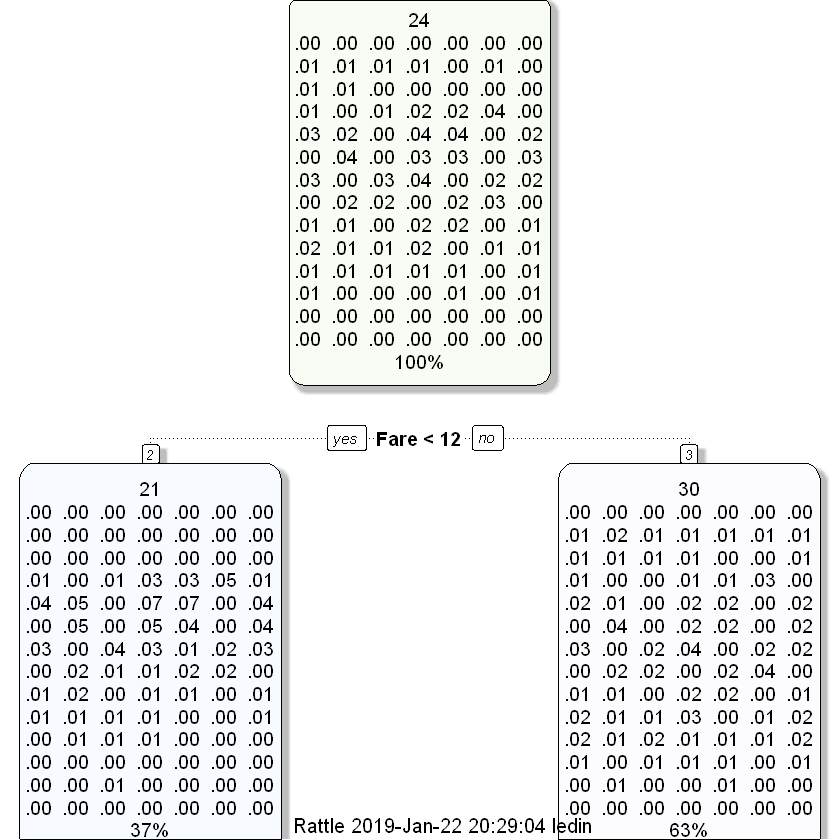

In [11]:
library(rattle)
library(rpart.plot)
library(RColorBrewer)
fancyRpartPlot(age.model)

In [12]:
#Clean Missing Values of Fare
upper.whisker <- boxplot.stats(full$Fare)$stats[5]
outlier.filter <- full$Fare < upper.whisker
full[outlier.filter,]
fare.equation = "Fare ~ Pclass + Sex + Age + SibSp + Parch + Embarked"
fare.model <- lm(
  formula = fare.equation,
  data = full[outlier.filter,])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrainset
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,TRUE
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,TRUE
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,TRUE
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,TRUE
6,6,0,3,"Moran, Mr. James",male,32,0,0,330877,8.4583,,Q,TRUE
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,TRUE
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,TRUE
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,TRUE
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,TRUE
11,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,TRUE


In [13]:
fare.row <- full[is.na(full$Fare),
                 c("Pclass" , "Sex" , "Age" , "SibSp" , "Parch" , "Embarked")]

fare.prediction <- predict(fare.model, newdata = fare.row)
full[is.na(full$Fare), "Fare"] <- fare.prediction

In [16]:
print(fare.prediction)

    1044 
9.043154 


In [17]:
#categorical Casting
full$Pclass = as.factor(full$Pclass)
full$Sex = as.factor(full$Sex)
full$Embarked = as.factor(full$Embarked)

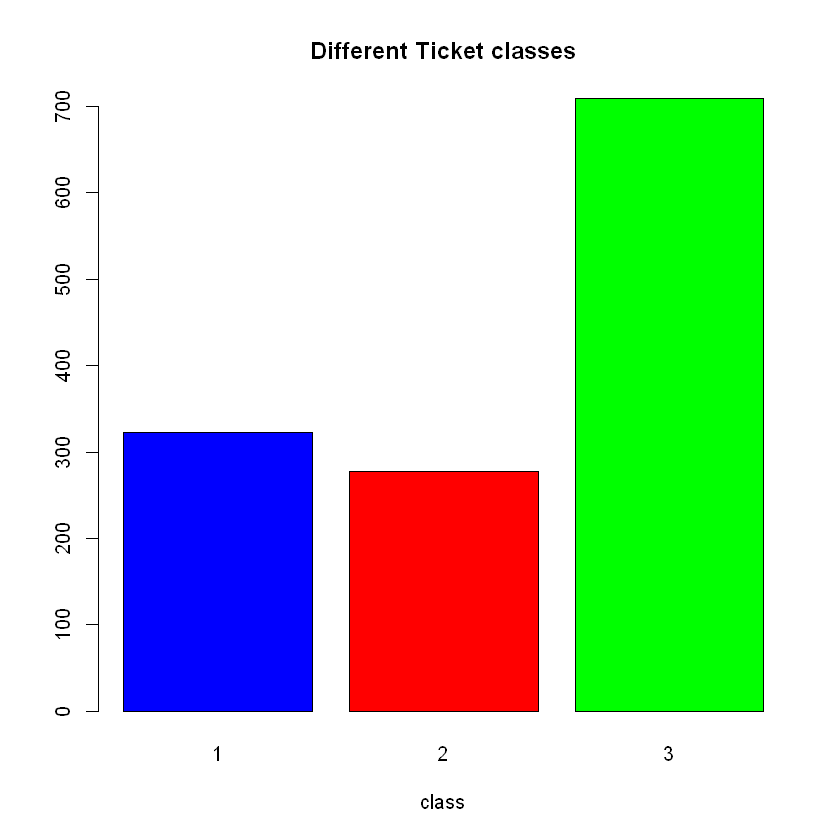

In [46]:
class_peop <- table(full$Pclass)
barplot(class_peop, main = "Different Ticket classes", 
       xlab = "class",col = c("blue", "red","green"))

In [18]:
#Sperating Full back into Test and Training sets
train = full[full$IsTrainset==TRUE,]
test = full[full$IsTrainset==FALSE,]
train$Survived = as.factor(train$Survived)

In [19]:
survived.equation = "Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare"
survived.formula = as.formula(survived.equation)

In [21]:
library(rpart)
titanic.model = rpart(formula = survived.formula, data = train, method = 'class') 
                             
Survived = predict(titanic.model, newdata = test, type = 'class')
head(Survived)
tail(Survived)

892 893 894 895 896 897 
  0   1   0   0   0   0 
Levels: 0 1

1304 1305 1306 1307 1308 1309 
   1    0    1    0    0    0 
Levels: 0 1

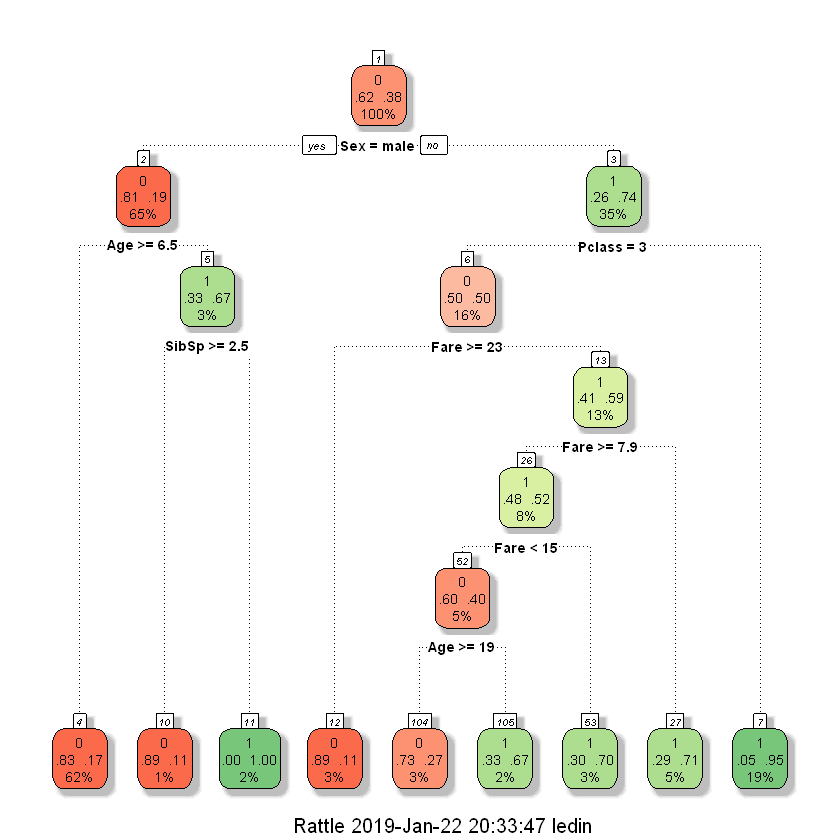

In [22]:
library(rattle)
library(rpart.plot)
library(RColorBrewer)
fancyRpartPlot(titanic.model, palettes = c("Reds", "YlGn"))


In [23]:
PassengerId = test$PassengerId
output.df = as.data.frame(PassengerId)
output.df$Survived = Survived

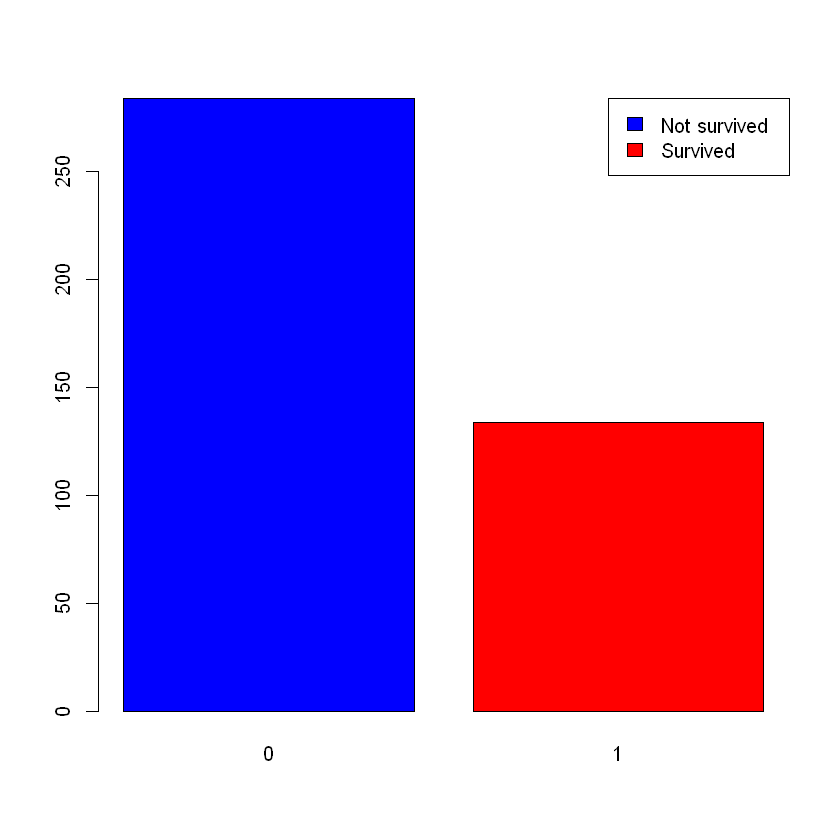

In [32]:
library(ggplot2)
counts <- table(output.df$Survived)
barplot(counts,col = c("blue","red"))
legend("topright",
c("Not survived","Survived"),
fill = c("blue","red")
)

In [ ]:
write.csv(output.df, file = "5_Submission.csv", row.names = FALSE)